# Check incorrect predictions

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from utils import *

## Read data

In [2]:
# reading image data
path_density = '../data/m1.dir_8_density/'
path_kinematics = '../data/m1.dir_8_kinematics/'
num_classes = 1
nmodel = int(1e4)
param = 'rho'
X_density,y_density = read_data(path_density,nmodel,num_classes,param)
X_kinematics,y_kinematics = read_data(path_kinematics,nmodel,num_classes,param)

reading data from: ../data/m1.dir_8_density/
reading data from: ../data/m1.dir_8_kinematics/


In [3]:
# read predictions
preds_density_file = '../gcloud_trained/m9.dir_e300_density_r/predictions_dir8.dat'
preds_kinematics_file = '../gcloud_trained/m9.dir_e300_kinematics_r/predictions_dir8.dat'
preds_joint_file = '../gcloud_trained/m9.dir_e300_joint_r/predictions_dir8.dat'

preds_density = read_predictions(preds_density_file)
preds_kinematics = read_predictions(preds_kinematics_file)

## Sort predictions
Get the differences in the predictions and the index values associated with those differences. This will allow us to visualise the galaxy 2D images that resulted in good/bad predictions.

In [4]:
# difference
difference_density = np.abs(np.subtract(np.array(y_density), np.array(preds_density).reshape((len(preds_density),1))))
difference_kinematics = np.abs(np.subtract(np.array(y_kinematics), np.array(preds_kinematics).reshape((len(preds_density),1))))
indices = np.arange(0,len(difference_density),1).reshape((len(difference_density),1))

density_error = np.concatenate((indices, difference_density), axis=1)
kinematics_error = np.concatenate((indices, difference_kinematics), axis=1)

print(density_error.shape)
print(kinematics_error.shape)

density_error_sorted = density_error[density_error[:,1].argsort()]
kinematics_error_sorted = kinematics_error[kinematics_error[:,1].argsort()]

(10000, 2)
(10000, 2)


In [5]:
bad_indices_den = []
bad_indices_kin = []
good_indices_den = []
good_indices_kin = []
n_samples = 50

for i in range(n_samples):
    
    # bad 
    index_den = int(density_error_sorted[-i][0])
    index_kin = int(kinematics_error_sorted[-i][0])
    bad_indices_den.append(index_den)
    bad_indices_kin.append(index_kin)
    
    # good
    index_den = int(density_error_sorted[i][0])
    index_kin = int(kinematics_error_sorted[i][0])
    good_indices_den.append(index_den)
    good_indices_kin.append(index_kin)
    

## Density Map Images

actual density value: 9.8650
predicted density value: 2.9656


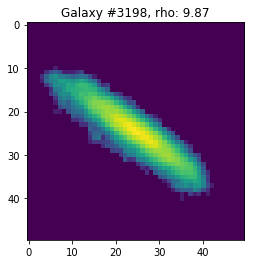

In [6]:
index = bad_indices_den[-16]
print('actual density value: %.4f' % y_density[index][0])
print('predicted density value: %.4f' % preds_density[index])
plot_galaxy(X_density, y_density, index)

actual density value: 8.2924
predicted density value: 8.2927


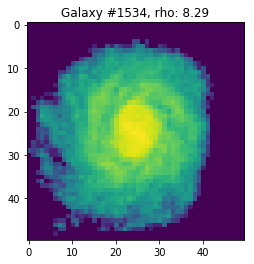

In [7]:
index = good_indices_den[1]
print('actual density value: %.4f' % y_density[index][0])
print('predicted density value: %.4f' % preds_density[index])
plot_galaxy(X_density, y_density, index)

## Kinematic Map Images

actual density value: 9.8650
predicted density value: 3.4328


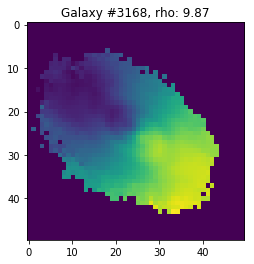

In [8]:
index = bad_indices_kin[-12]
print('actual density value: %.4f' % y_kinematics[index][0])
print('predicted density value: %.4f' % preds_kinematics[index])
plot_galaxy(X_kinematics, y_kinematics, index)

actual density value: 5.8242
predicted density value: 5.8263


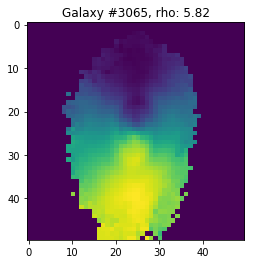

In [9]:
index = good_indices_kin[5]
print('actual density value: %.4f' % y_kinematics[index][0])
print('predicted density value: %.4f' % preds_kinematics[index])
plot_galaxy(X_kinematics, y_kinematics, index)

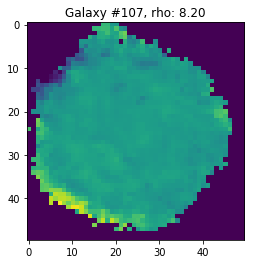

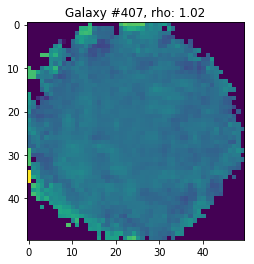

In [10]:
index = [107,407]
for i in range(len(index)):
    plot_galaxy(X_kinematics, y_kinematics, index[i])

actual v: 8.1973
predicted d: 5.4103


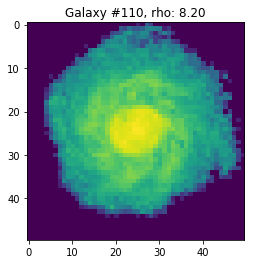

In [15]:
index = 110
print('actual v: %.4f' % y_density[index][0])
print('predicted d: %.4f' % preds_density[index])
plot_galaxy(X_density, y_density, index)